# 

# Table of Contents

## 01. Importing Libraries and Dataframes

## 02. The Elbow Technique

## 03. k-Means Clustering

## 04. Extracting Dataframe

---------

# 01. Importing Libraries and Dataframes

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path= r'C:\Users\princess\Downloads\12-23 Gun Violence Analysis'

In [4]:
#importing cleaned dataset 

gv_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '6.4_gun_violence_cleaned.csv'))

In [5]:
gv_df.head()

,Unnamed: 0,Incident ID,Date,Year,Month,Weekday,State,City or County,Number Killed,Number Injured,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,0,4,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,1,460726,2013-01-01,2013,1,1,California,Hawthorne,1,3,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1,3,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,3,478925,2013-01-05,2013,1,5,Colorado,Aurora,4,0,...,NaN,NaN,0,0,4,4,3,1,3,1
4,4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,2,2,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [6]:
#drop unnamed column 
gv_df = gv_df.drop(columns = ['Unnamed: 0'])

In [7]:
# Check the column names 

gv_df.columns

Index(['Incident ID', 'Date', 'Year', 'Month', 'Weekday', 'State',
       'City or County', 'Number Killed', 'Number Injured',
       'Number of Guns Involved', 'Incident Characteristics',
       'Congressional District', 'Latitude', 'Longitude', 'Location Combined',
       'Location Description', 'Notes', 'Child Participants 0-11',
       'Teen Participants 12-17', 'Adult Participants 18+',
       'Total Participants', 'Male Participants', 'Female Participants',
       'Victim Count', 'Suspect Count'],
      dtype='object')

In [8]:
# changing weekday and month numbers to weekday and month names to make it easier to interpret data for later 

#first checking data types

gv_df['Weekday'].dtype
gv_df['Month'].dtype

dtype('int64')

In [9]:
#checking unique values for weekdays so i know if it starts with 0 or 1 

# Assuming 'Weekday' is the column representing weekdays in gv_df
unique_weekdays = gv_df['Weekday'].unique()

# Print the unique values
print(unique_weekdays)

[1 5 0 2 4 6 3]


In [10]:
import calendar

# changing the numeric values of weekday and month to their calendar names 
gv_df['Weekday'] = gv_df['Weekday'].apply(lambda x: calendar.day_name[x])
gv_df['Month'] = gv_df['Month'].apply(lambda x: calendar.month_name[x])

In [11]:
gv_df.head(16)

,Incident ID,Date,Year,Month,Weekday,State,City or County,Number Killed,Number Injured,Number of Guns Involved,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,461105,2013-01-01,2013,January,Tuesday,Pennsylvania,Mckeesport,0,4,NaN,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,460726,2013-01-01,2013,January,Tuesday,California,Hawthorne,1,3,NaN,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,478855,2013-01-01,2013,January,Tuesday,Ohio,Lorain,1,3,2.0,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,478925,2013-01-05,2013,January,Saturday,Colorado,Aurora,4,0,NaN,...,NaN,NaN,0,0,4,4,3,1,3,1
4,478959,2013-01-07,2013,January,Monday,North Carolina,Greensboro,2,2,2.0,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1
5,478948,2013-01-07,2013,January,Monday,Oklahoma,Tulsa,4,0,NaN,...,Fairmont Terrace,NaN,0,0,6,6,2,4,4,2
6,479363,2013-01-19,2013,January,Saturday,New Mexico,Albuquerque,5,0,2.0,...,NaN,NaN,3,1,2,6,3,3,5,1
7,479374,2013-01-21,2013,January,Monday,Louisiana,New Orleans,0,5,NaN,...,NaN,Unprovoked drive-by results in multiple teens ...,0,0,0,5,5,0,5,1
8,479389,2013-01-21,2013,January,Monday,California,Brentwood,0,4,NaN,...,NaN,Perps were likely motivated by gang affliations,0,3,1,5,5,0,4,1
9,492151,2013-01-23,2013,January,Wednesday,Maryland,Baltimore,1,6,NaN,...,NaN,Shooting occurred over illegal dice game; vict...,0,1,6,1,1,0,7,0


In [12]:
#check for missing values 
gv_df.isnull().sum()

Incident ID                      0
Date                             0
Year                             0
Month                            0
Weekday                          0
State                            0
City or County                   0
Number Killed                    0
Number Injured                   0
Number of Guns Involved      99451
Incident Characteristics       326
Congressional District       11944
Latitude                      7923
Longitude                     7923
Location Combined                0
Location Description        197588
Notes                        81017
Child Participants 0-11          0
Teen Participants 12-17          0
Adult Participants 18+           0
Total Participants               0
Male Participants                0
Female Participants              0
Victim Count                     0
Suspect Count                    0
dtype: int64

In [13]:
# Create a subset which contains only the needed numerical columns (that also don't have NaNs)

df = gv_df[['Number Killed', 'Number Injured', 'Location Combined', 'Child Participants 0-11', 'Teen Participants 12-17',
            'Adult Participants 18+', 'Total Participants', 'Male Participants', 'Female Participants', 'Victim Count', 'Suspect Count' ]]

--------

# 02. The Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

C:\Users\princess\Downloads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\princess\Downloads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\princess\Downloads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\princess\Downloads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

[-4343069.967681591,
 -2566727.00850036,
 -2062213.9939484864,
 -1695881.0366956636,
 -1457448.440636986,
 -1341540.4067134112,
 -1238232.2673658645,
 -1143566.7334638974,
 -1096976.7250146777]

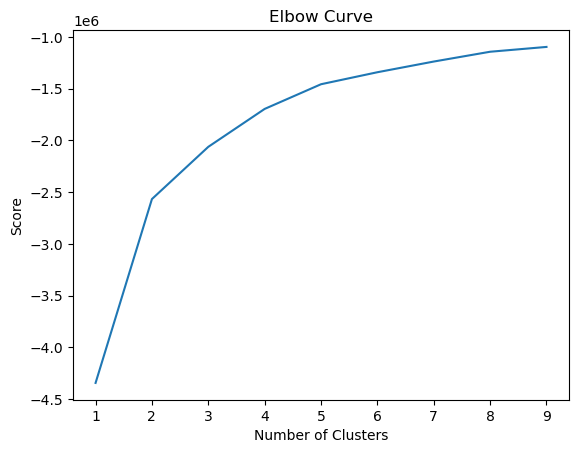

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a jump from 2 to 3 to 4 to 5 before the line smoothes out. Therefore, based on this chart, I will use 5 as my cluster number.

------

# 03. k-Means Clustering

In [17]:
#create the k-means object
kmeans = KMeans(n_clusters = 5)

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\princess\Downloads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\princess\Downloads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\princess\AppData\Local\Temp\ipykernel_12808\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [20]:
df.head()

,Number Killed,Number Injured,Location Combined,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count,clusters
0,0,4,0,0,0,5,4,3,1,4,1,2
1,1,3,1,0,0,4,1,1,0,4,1,2
2,1,3,0,0,0,5,5,5,0,3,2,2
3,4,0,2,0,0,4,4,3,1,3,1,2
4,2,2,3,0,1,3,4,2,2,3,1,2


In [21]:
# Check the frequency of each unique value in the 'clusters' column

df['clusters'].value_counts()

clusters
0    94682
4    62328
3    43293
2    22918
1    16456
Name: count, dtype: int64

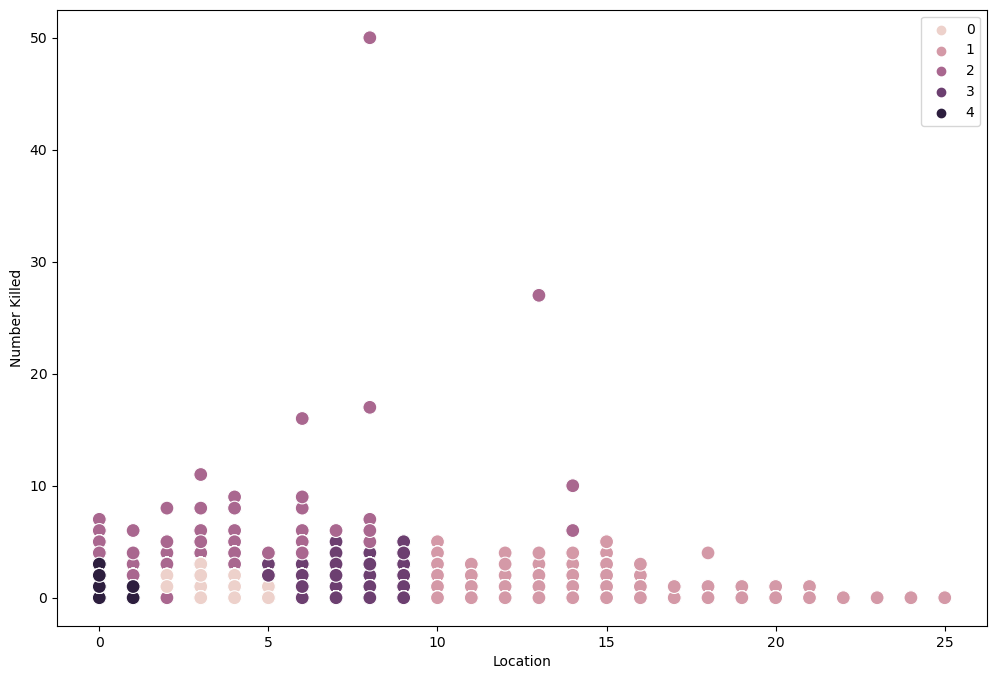

In [22]:
# Plot the clusters for the "Number Killed" and "Location Combined" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Location Combined'], y=df['Number Killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Location') # Label x-axis.
plt.ylabel('Number Killed') # Label y-axis.
plt.show()

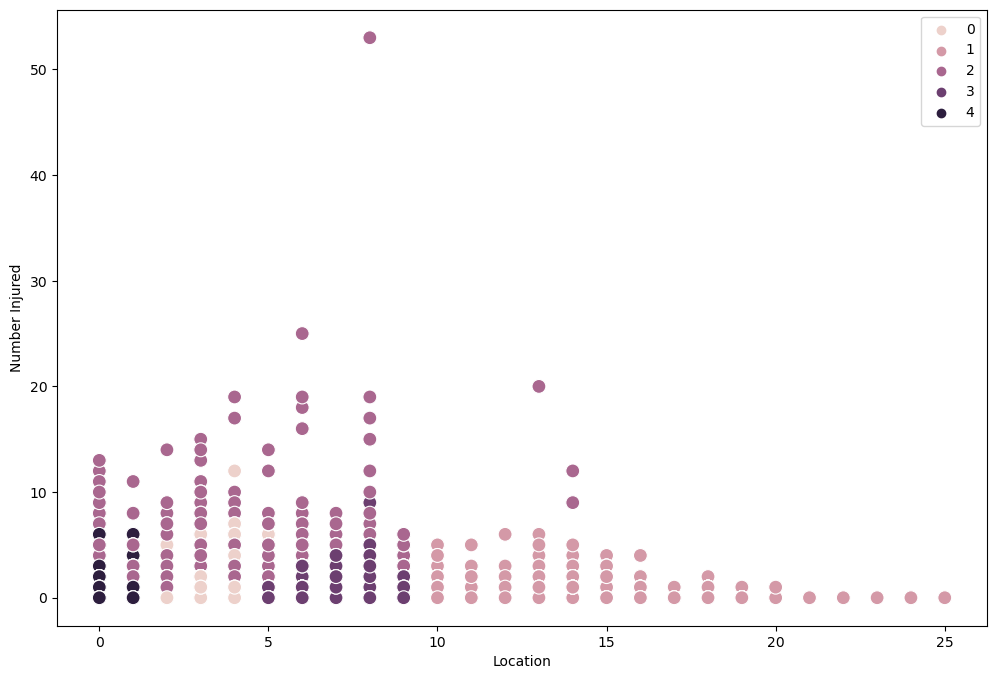

In [23]:
# Plot the clusters for the "number injured" and "location combined" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Location Combined'], y=df['Number Injured'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Location') 
plt.ylabel('Number Injured') 
plt.show()

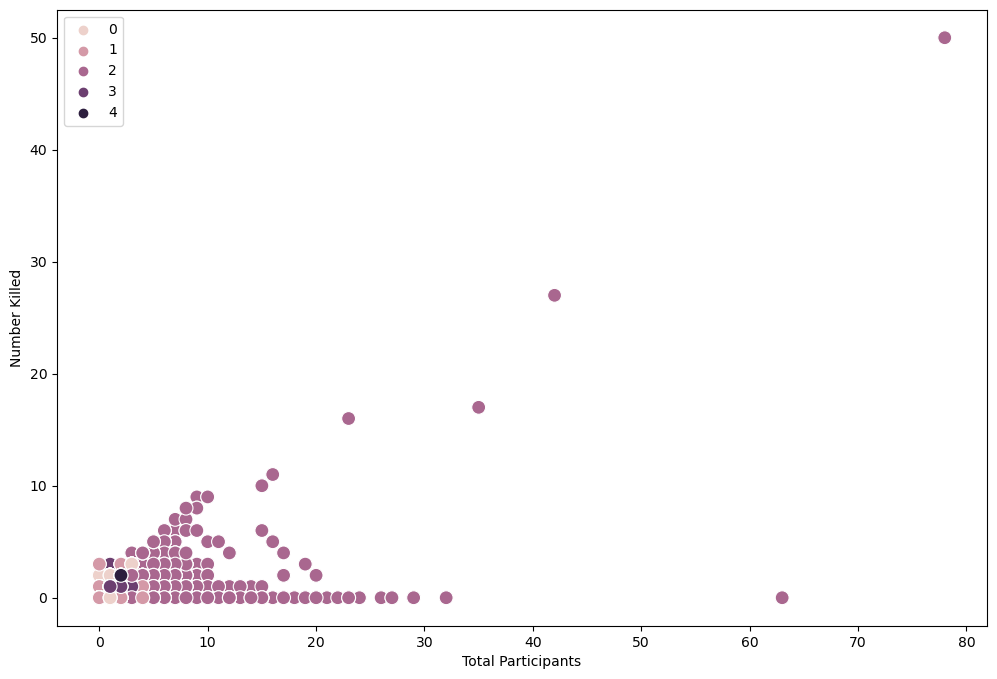

In [24]:
# Plot the clusters for the "number killed" and "total participants" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Participants'], y=df['Number Killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Participants') 
plt.ylabel('Number Killed') 
plt.show()

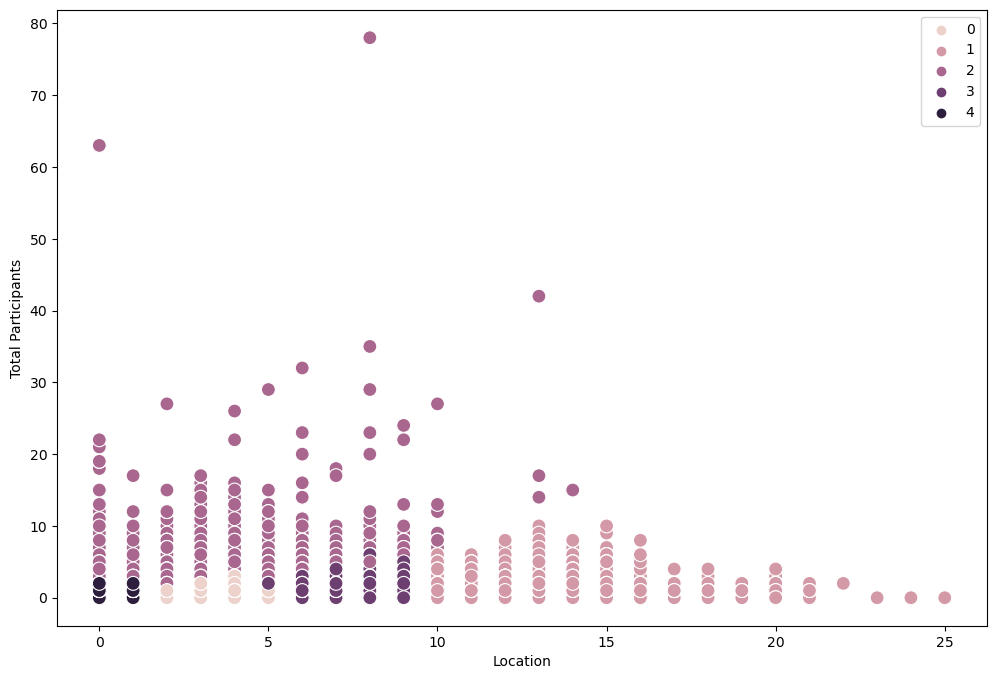

In [25]:
# Plot the clusters for the "total participants" and "location combined" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Location Combined'], y=df['Total Participants'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Location') 
plt.ylabel('Total Participants') 
plt.show()

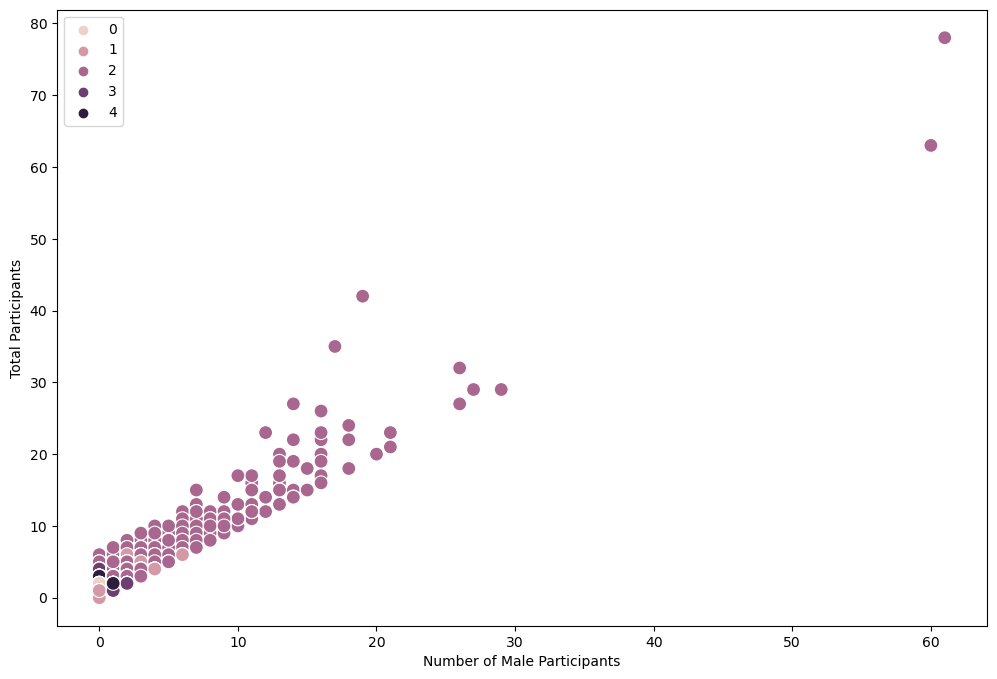

In [26]:
# Plot the clusters for the "total participants" and "male participants" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Male Participants'], y=df['Total Participants'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Male Participants') 
plt.ylabel('Total Participants') 
plt.show()

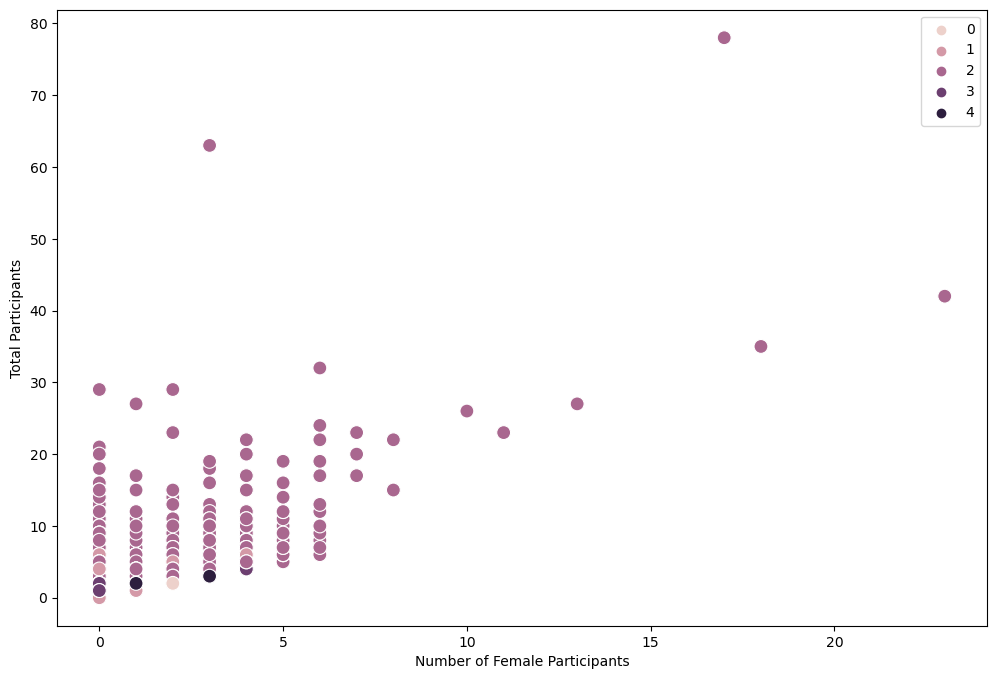

In [27]:
# Plot the clusters for the "total participants" and "female participants" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Female Participants'], y=df['Total Participants'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Female Participants') 
plt.ylabel('Total Participants') 
plt.show()

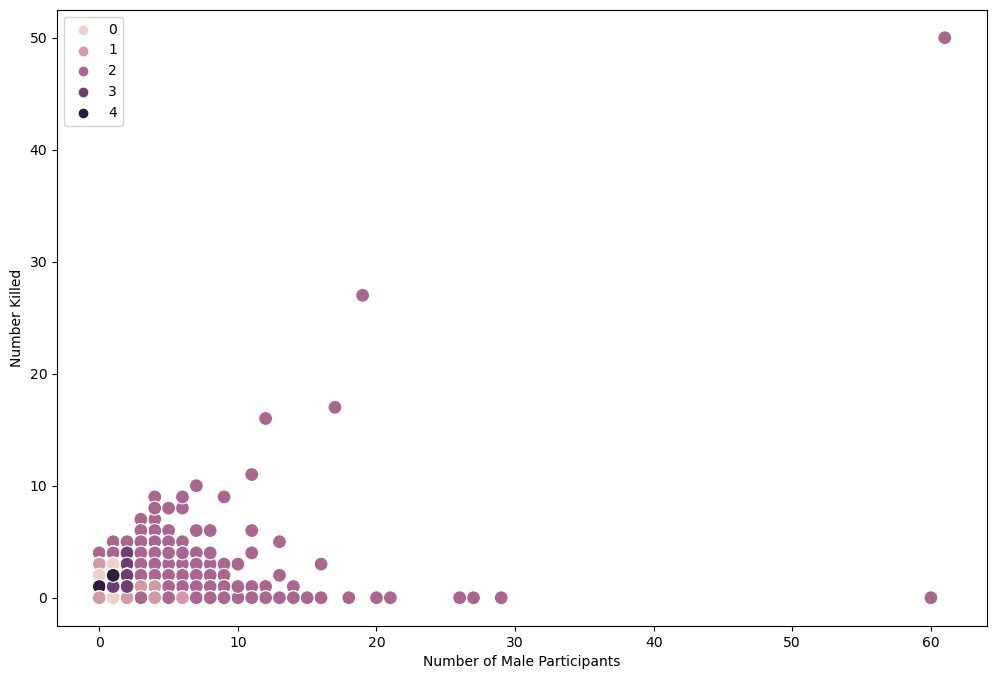

In [28]:
# Plot the clusters for the "male participants" and "number killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Male Participants'], y=df['Number Killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Male Participants') 
plt.ylabel('Number Killed') 
plt.show()

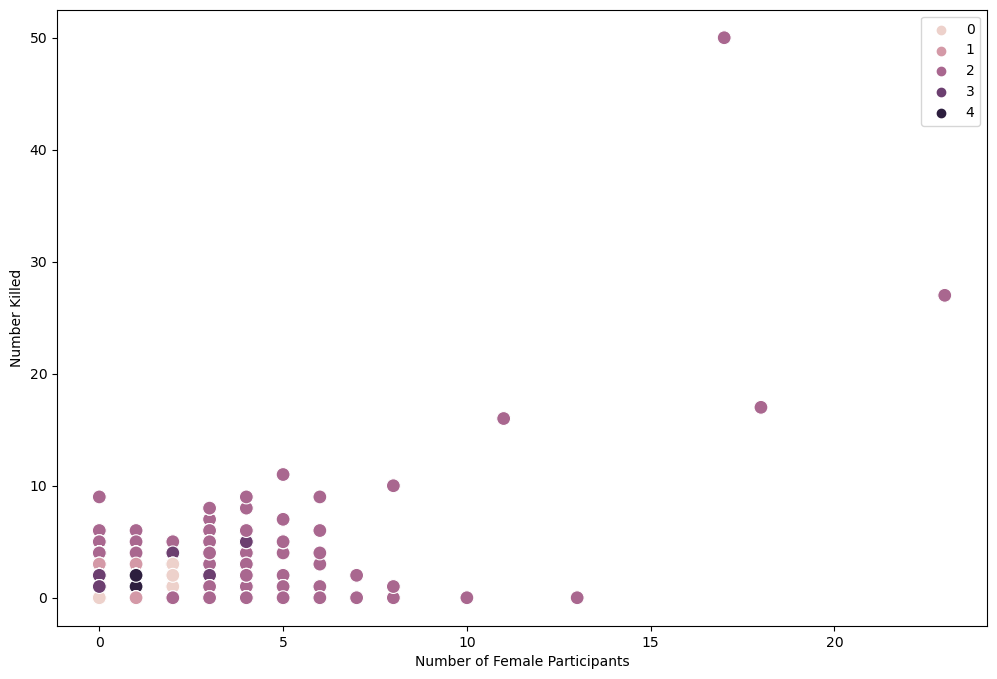

In [29]:
# Plot the clusters for the "female participants" and "number killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Female Participants'], y=df['Number Killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Female Participants') 
plt.ylabel('Number Killed') 
plt.show()

#### After looking at various charts, it seems that that the total number of participants and male participants seems to have the strongest relationship in comparison to other variables. Additionally, the dark purple cluster, or cluster #5, has the highest levels for all graphs, followed by cluster #1. 

In [30]:
#create a column that renames the clusters to colors 
df.loc[df['clusters'] == 4, 'cluster'] = 'black'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'peach'

C:\Users\princess\AppData\Local\Temp\ipykernel_12808\2972364705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 4, 'cluster'] = 'black'


In [31]:
df.columns

Index(['Number Killed', 'Number Injured', 'Location Combined',
       'Child Participants 0-11', 'Teen Participants 12-17',
       'Adult Participants 18+', 'Total Participants', 'Male Participants',
       'Female Participants', 'Victim Count', 'Suspect Count', 'clusters',
       'cluster'],
      dtype='object')

In [32]:
df.groupby('cluster').agg({'Number Killed':['mean', 'median'], 
                         'Number Injured':['mean', 'median'], 
                         'Total Participants':['mean', 'median'],
                           'Male Participants':['mean', 'median'],
                           'Female Participants':['mean', 'median']})
                        
                        

Number Killed        Number Injured        Total Participants  \
                     mean median           mean median               mean   
cluster                                                                     
black            0.184556    0.0       0.480474    0.0           1.158917   
dark purple      0.283048    0.0       0.407479    0.0           1.344444   
peach            0.229199    0.0       0.446252    0.0           1.100241   
pink             0.316966    0.0       0.399611    0.0           1.548797   
purple           0.427350    0.0       0.959333    1.0           3.769133   

                   Male Participants        Female Participants         
            median              mean median                mean median  
cluster                                                                 
black          1.0          1.037030    1.0            0.121871    0.0  
dark purple    1.0          1.167094    1.0            0.177350    0.0  
peach          1.0          0.965833    1.0            0.134408    0.0  
pink           1.0          1.345771    1.0            0.203026    0.0  
purple         3.0          3.287634    3.0            0.481499    0.0

##### Conclusions

The purple cluster (#2) has a higher average number of people injured (mean is about 0.96) and a relatively higher average total number of participants (mean is about 3.77) compared to other clusters. The black cluster (#4) has the lowest average number of people killed (mean is about 0.18), injured (mean is about 0.48), and total participants (mean is about 1.16). The dark purple (#3) and peach clusters (#0) have relatively lower average values for these variables than the purple cluster but higher than the black cluster. The purple cluster (#2) shows an intermediate severity level, with a higher average total number of participants (mean is about 3.77) than other clusters.

##### Propositions for Future?

I could use the cluster characteristics to identify clusters with higher severity (e.g., higher mean number of people injured or killed). This information can be crucial for law enforcement agencies or policymakers to prioritize resources and interventions in high-risk areas. Additionally, I can conduct a spatial analysis to visualize the geographical distribution of clusters. Are certain areas or regions more prone to severe incidents? This information can guide local law enforcement in targeted interventions and community engagement efforts. Looking at demographic factors can further deepen the analysis and can allow me to garner a better understanding of any affected communities.

--------

# 04. Extracting Dataframe

In [33]:
df.head()

,Number Killed,Number Injured,Location Combined,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count,clusters,cluster
0,0,4,0,0,0,5,4,3,1,4,1,3,dark purple
1,1,3,1,0,0,4,1,1,0,4,1,0,peach
2,1,3,0,0,0,5,5,5,0,3,2,3,dark purple
3,4,0,2,0,0,4,4,3,1,3,1,3,dark purple
4,2,2,3,0,1,3,4,2,2,3,1,3,dark purple


In [34]:
# renaming clusters and cluster so it matches the rest of the df columns format

df.rename(columns={'clusters': 'Clusters'}, inplace=True)
df.rename(columns={'cluster': 'Cluster Color'}, inplace=True)

C:\Users\princess\AppData\Local\Temp\ipykernel_16172\265411768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'clusters': 'Clusters'}, inplace=True)
C:\Users\princess\AppData\Local\Temp\ipykernel_16172\265411768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'cluster': 'Cluster Color'}, inplace=True)


In [35]:
df.head()

,Number Killed,Number Injured,Location Combined,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count,Clusters,Cluster Color
0,0,4,0,0,0,5,4,3,1,4,1,3,dark purple
1,1,3,1,0,0,4,1,1,0,4,1,0,peach
2,1,3,0,0,0,5,5,5,0,3,2,3,dark purple
3,4,0,2,0,0,4,4,3,1,3,1,3,dark purple
4,2,2,3,0,1,3,4,2,2,3,1,3,dark purple


In [36]:
df.columns

Index(['Number Killed', 'Number Injured', 'Location Combined',
       'Child Participants 0-11', 'Teen Participants 12-17',
       'Adult Participants 18+', 'Total Participants', 'Male Participants',
       'Female Participants', 'Victim Count', 'Suspect Count', 'Clusters',
       'Cluster Color'],
      dtype='object')

In [37]:
# merging gv_df and df so i can add the clusters and cluster color to the main data frame
merged_df = pd.merge(gv_df, df[['Clusters', 'Cluster Color']], left_index=True, right_index=True)

# Display the merged DataFrame
merged_df.head(16)

,Incident ID,Date,Year,Month,Weekday,State,City or County,Number Killed,Number Injured,Number of Guns Involved,...,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count,Clusters,Cluster Color
0,461105,2013-01-01,2013,January,Tuesday,Pennsylvania,Mckeesport,0,4,NaN,...,0,0,5,4,3,1,4,1,3,dark purple
1,460726,2013-01-01,2013,January,Tuesday,California,Hawthorne,1,3,NaN,...,0,0,4,1,1,0,4,1,0,peach
2,478855,2013-01-01,2013,January,Tuesday,Ohio,Lorain,1,3,2.0,...,0,0,5,5,5,0,3,2,3,dark purple
3,478925,2013-01-05,2013,January,Saturday,Colorado,Aurora,4,0,NaN,...,0,0,4,4,3,1,3,1,3,dark purple
4,478959,2013-01-07,2013,January,Monday,North Carolina,Greensboro,2,2,2.0,...,0,1,3,4,2,2,3,1,3,dark purple
5,478948,2013-01-07,2013,January,Monday,Oklahoma,Tulsa,4,0,NaN,...,0,0,6,6,2,4,4,2,3,dark purple
6,479363,2013-01-19,2013,January,Saturday,New Mexico,Albuquerque,5,0,2.0,...,3,1,2,6,3,3,5,1,3,dark purple
7,479374,2013-01-21,2013,January,Monday,Louisiana,New Orleans,0,5,NaN,...,0,0,0,5,5,0,5,1,3,dark purple
8,479389,2013-01-21,2013,January,Monday,California,Brentwood,0,4,NaN,...,0,3,1,5,5,0,4,1,3,dark purple
9,492151,2013-01-23,2013,January,Wednesday,Maryland,Baltimore,1,6,NaN,...,0,1,6,1,1,0,7,0,3,dark purple


In [39]:
# extracting dataframe to csv

merged_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data','6.5_gun_violence_cleaned.csv'))